In [3]:
# Loading important librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
data = pd.read_csv('archive/driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


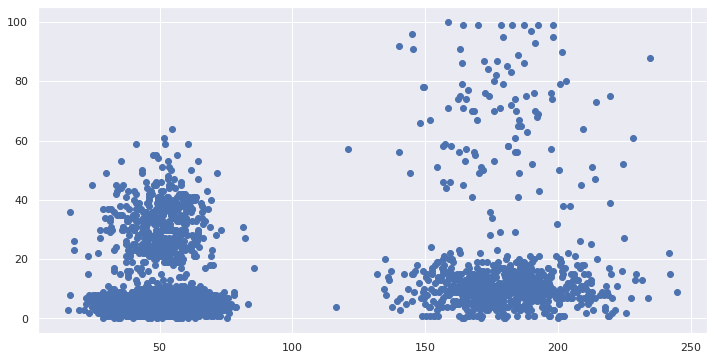

In [13]:
plt.scatter(data.mean_dist_day, data.mean_over_speed_perc)
plt.show()

In [14]:
# Check the number of columns and entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [15]:
# Describe the dataset
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [16]:
# Importing clustering
from sklearn.cluster import KMeans

In [17]:
data_analyze = data.drop('id', axis=1)

In [19]:
# Instantiate clustering and fit the cluster model
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_analyze)

KMeans(n_clusters=2)

In [22]:
# Check the cluster centers
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [23]:
# Visualize the cluster label
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [25]:
# Number of cluster label
kmeans.labels_.size

4000

In [26]:
# Visualize the clustering
import mglearn

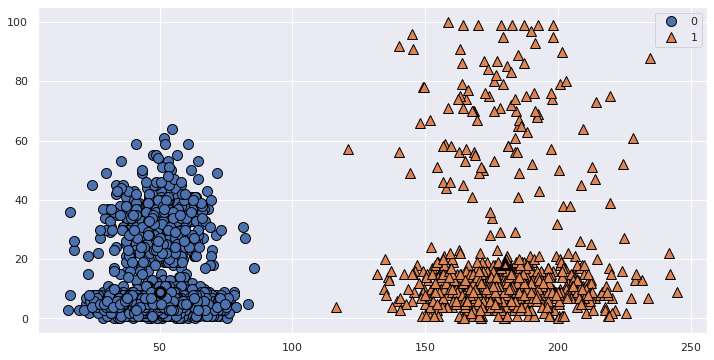

In [43]:
mglearn.discrete_scatter(data_analyze.values[:, 0], data_analyze.values[:, 1], y=kmeans.labels_)
plt.legend()
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], y=[0, 1], markeredgewidth=3)
plt.show()

In [49]:
data_analyze['cluster'] = kmeans.labels_

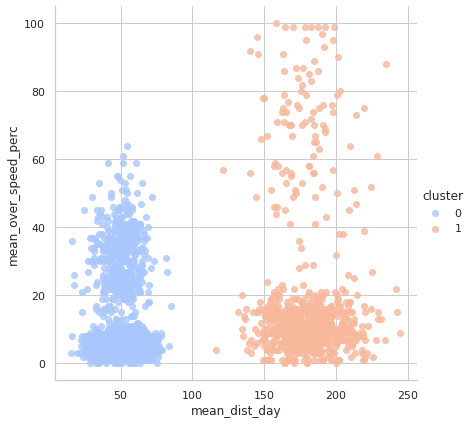

In [63]:
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', hue='cluster', data=data_analyze,
           palette='coolwarm', size=6, aspect=1, fit_reg=False)
plt.show()

In [46]:
# Labels unique value count and data type
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


In [66]:
# Testing with 4 cluser
kmeans_4 = KMeans(n_clusters=4)

In [68]:
kmeans_4.fit(data.drop('id', axis=1))

KMeans(n_clusters=4)

In [70]:
# clusters centers
kmeans_4.cluster_centers_

array([[177.83509615,  70.28846154],
       [ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [ 50.46127059,  32.42823529]])

In [71]:
# clusters labels 
kmeans_4.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [73]:
data_analyze['cluster_4'] = kmeans_4.labels_

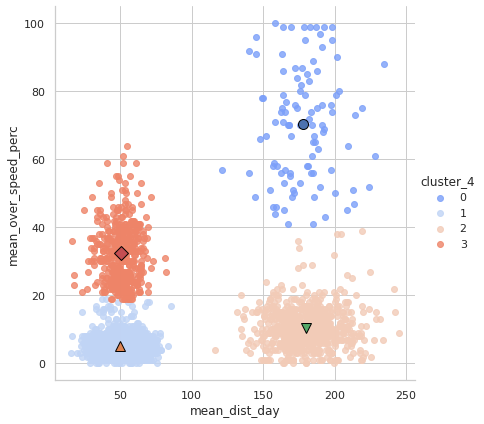

In [77]:
# Visualize the clusters
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', hue='cluster_4', data=data_analyze,
           palette='coolwarm', size=6, aspect=1, fit_reg=False)
mglearn.discrete_scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1],
                         y=np.unique(kmeans_4.labels_))
plt.show()

In [78]:
1300000 / 12000

108.33333333333333

In [80]:
108 / 30

3.6